In [535]:
import numpy as np
import torch
import ndjson
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image

In [536]:
with open('data/simplified/hat.ndjson') as f:
    data = ndjson.load(f)

In [537]:
print(data[0])

{'word': 'hat', 'countrycode': 'AU', 'timestamp': '2017-03-28 07:06:35.7 UTC', 'recognized': True, 'key_id': '5157744208248832', 'drawing': [[[134, 117, 95, 62, 42, 25, 14, 3, 0], [14, 5, 1, 0, 6, 16, 30, 54, 71]], [[140, 142], [14, 64]], [[0, 62, 139, 255], [72, 74, 66, 36]]]}


In [538]:
test = data[0]['drawing']

In [539]:
def combine_strokes(strokes):
    x_array = []
    y_array = []
    for i in range(len(strokes)):
        x_array += strokes[i][0]
        y_array += strokes[i][1]
        
    return [x_array, y_array]

In [540]:
# pixels = np.array(combine_strokes(test))

In [541]:
# pixels

In [542]:
# base_image = np.ones((256, 256)) 
# print(base_image)
# plt.imshow(base_image, cmap='gray')
# plt.plot()

In [543]:
# for i in range(len(pixels[0])):
#     base_image[pixels[0][i], pixels[1][i]] = 0
#     print([pixels[0][i], pixels[1][i]])
# plt.imshow(base_image, cmap='gray')
# plt.show()

In [653]:
def draw_from_strokes(strokes):
    base_img = np.ones((256, 256))
    for stroke in strokes:
        for i in range(len(stroke[0]) - 1):
            pt1 = (stroke[0][i], stroke[1][i])
            pt2 = (stroke[0][i + 1], stroke[1][i + 1])
            cv2.line(base_img, pt1, pt2, color=0, thickness=4, lineType=cv2.LINE_AA)
    return base_img

def draw_from_strokes2(strokes):
    val = 256
    plt.figure(figsize=(val/96, val/96), dpi=96)
    plt.axis('off')
    plt.xlim(0,255)
    plt.ylim(0,255)
    for stroke in strokes:
        for i in range(len(stroke[0]) - 1):
            pt1 = (stroke[0][i], stroke[1][i])
            pt2 = (stroke[0][i + 1], stroke[1][i + 1])
            x = (stroke[0][i], stroke[0][i + 1])
            y = (255 - stroke[1][i], 255 - stroke[1][i + 1])
            plt.plot(x, y, color='black', linewidth=4, marker=None)
    plt.savefig("my_img.png")
    plt.close()
    img = np.array(Image.open("my_img.png").convert('L'))
    return img / 255.
    
#     plt.show()

In [677]:
test = data[23]['drawing']
print(test)
img1 = draw_from_strokes(test)

[[[75, 47, 24, 10, 1, 0, 10, 31, 62, 121, 163, 194, 217, 237, 250, 255, 253, 223, 188, 169], [85, 89, 104, 119, 138, 172, 200, 215, 224, 225, 220, 213, 200, 175, 153, 133, 117, 91, 70, 69]], [[69, 72], [8, 102]], [[54, 67, 113, 138, 154, 159, 160, 164], [0, 5, 6, 13, 25, 34, 122, 150]], [[61, 68], [82, 150]]]


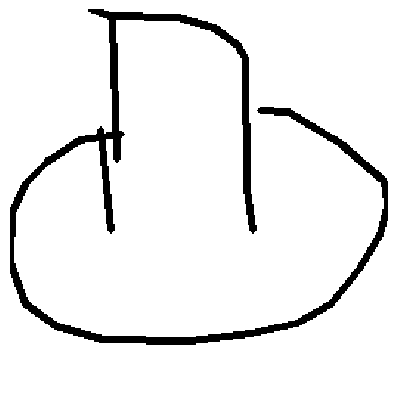

In [678]:
plt.figure(figsize=(500/96, 500/96), dpi=96)
plt.axis('off')
plt.imshow(img1, cmap='gray')
plt.show()

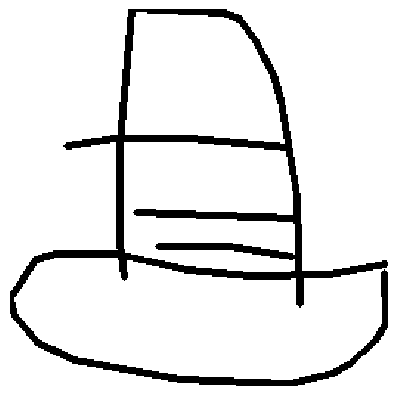

In [660]:
# img2 = draw_from_strokes2(test)
# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img2, cmap='gray')
# plt.show()

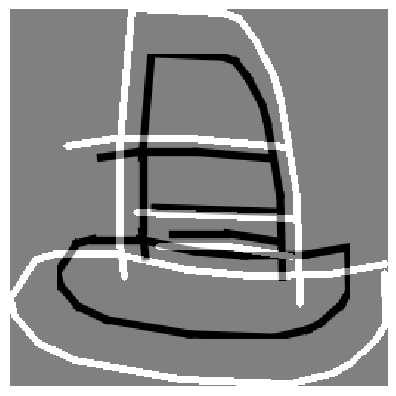

In [657]:
# img1 = draw_from_strokes2(test)
# img2 = draw_from_strokes(test)

# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img1-img2, cmap='gray')
# plt.show()

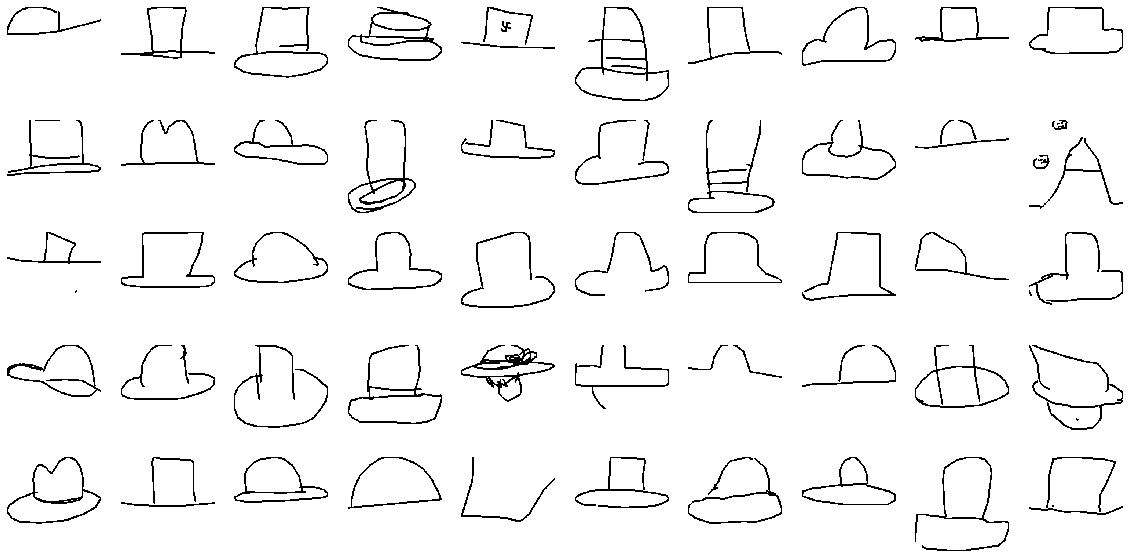

In [658]:
fig, axes = plt.subplots(5, 10, figsize=(20,10))
for x in range(5):
    for y in range(10):
        strokes = data[x + y * 10]['drawing']
        img = draw_from_strokes(strokes)
        axes[x, y].imshow(img, cmap='gray')
        axes[x, y].axis('off')

plt.show()

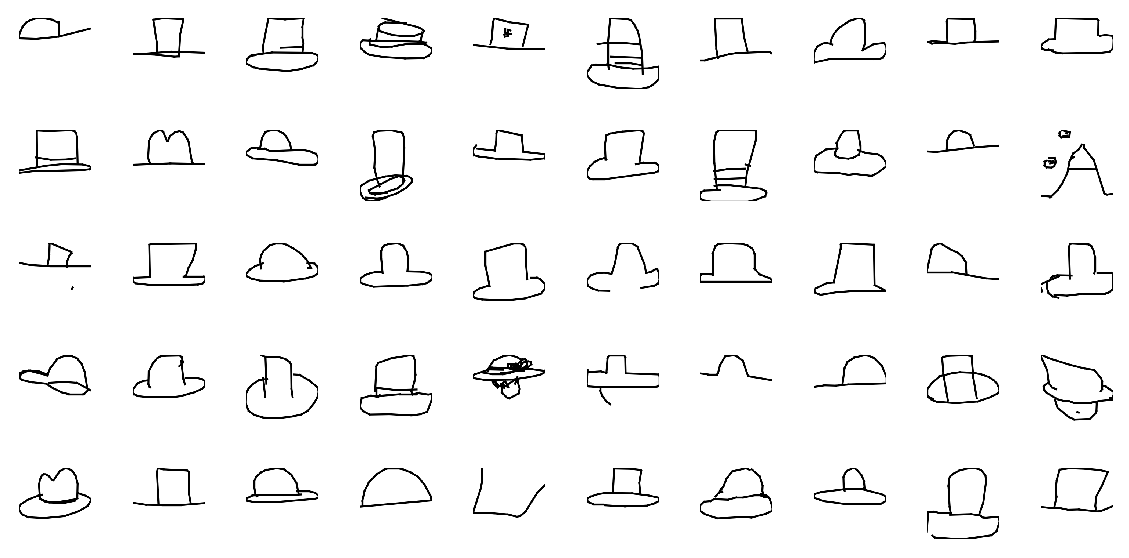

In [659]:
fig, axes = plt.subplots(5, 10, figsize=(20,10))
for x in range(5):
    for y in range(10):
        strokes = data[x + y * 10]['drawing']
        img = draw_from_strokes2(strokes)
        axes[x, y].imshow(img, cmap='gray')
        axes[x, y].axis('off')

plt.show()